Perguntas de pesquisa que irão guiar essa investigação

Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre os níveis e formação ?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre pessoas mais e menos experientes ?
Será que existem diferenças enrtre os níveis de adaptação, satisfação e burnout entre pessoas mais velhas e mais novas?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout e as funções realizadas nos projetos?

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import ttest_ind
#import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

dados = pd.read_excel('data\dados_doutorado_python.xlsx')
dados.head()
dados.columns


c:\Users\danilo\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Index(['sexo', 'idade', 'formacao', 'curso', 'anoFormacao',
       'tempoProfissional', 'tempoFuncao', 'funcao', 'metodologia',
       'existenciaProjeto', 'mesesNoProjeto', 'S1', 'S2', 'S3', 'C2', 'C3',
       'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4', 'T2', 'I2',
       'I1', 'I4', 'I3', 'equipe1', 'reque1', 'reque2', 'reque3', 'tec1',
       'req4', 'tec2', 'tec3', 'tec4', 'req5', 'equipe2', 'equipe3', 'req6',
       'tec5', 'tec6', 'req7', 'equipe4', 'ci2', 'et6', 'ci3', 'et4', 'ee6',
       'ee2', 'et5', 'ci1', 'ee4', 'ee1', 'et1', 'et2', 'et3', 'ee3', 'ci4',
       'ee5', 'sat1', 'sat2', 'sat3', 'sat4'],
      dtype='object')

In [4]:
#dados.dropna(inplace=True)
#dados.describe().transpose()

def mudavalor(x):
    if x==1:
        return 7
    elif x==2:
        return 6
    elif x==3:
        return 5
    elif x==4:
        return 4
    elif x==5:
        return 3
    elif x==6:
        return 2
    elif x==7:
        return 1

dados['tec5'] = dados['tec5'].apply(mudavalor)    

In [5]:

dados['Gerenciamento_Stress'] = (dados['S1']+dados['S2']+dados['S3'])/3
dados['Resolucao_Problemas'] = (dados['C1']+dados['C2']+dados['C3']+dados['C4'])/4
dados['Gerenciamento_Emergencia'] = (dados['EM1']+dados['EM2']+dados['EM3'])/3
dados['Aprendizado'] = (dados['T1']+dados['T2']+dados['T3']+dados['T4'])/4
dados['Interpersoal'] = (dados['I1']+dados['I2']+dados['I3']+dados['I4'])/4
dados['satisfacao']= (dados['sat1']+dados['sat2']+dados['sat4'])/3
dados['Burnout_cinismo'] = (dados['ci1']+dados['ci2']+dados['ci3']+dados['ci4'])/4
dados['Burnout_exaustao'] = (dados['ee1']+dados['ee2']+dados['ee3']+dados['ee5']+dados['ee6'])/6
dados['Burnout_eficacia'] = (dados['et1']+dados['et2']+dados['et3']+dados['et4']+dados['et5']+dados['et6'])/6
dados['instabilidade_equipe'] = (dados['equipe1']+dados['equipe2']+dados['equipe3']+dados['equipe4'])/4
dados['instabilidade_tecnica'] = (dados['tec1']+dados['tec2']+dados['tec3']+dados['tec4']+dados['tec5'])/5
dados['instabilidade_tarefa'] = (dados['reque1']+dados['reque2']+dados['reque3']+dados['req4']+dados['req5']+dados['req6']+dados['req7'])/7

dados.columns

labels = ['S1', 'S2', 'S3',
          'C2', 'C3', 'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4',
          'T2', 'I2', 'I1', 'I4', 'I3',
         'equipe1',
          'reque1', 'reque2', 'reque3', 'tec1', 'req4', 'tec2', 'tec3', 'tec4',
          'req5', 'equipe2', 'equipe3', 'req6', 'tec5', 'tec6', 'req7', 'equipe4',
          'ci2', 'et6', 'ci3', 'sat4','sat3','sat4','et6','ee4',
          'ee6', 'ee2', 'et5', 'ci1', 'et4', 'ee1', 'et1', 'et2', 'et3', 'ee3',
          'ci4', 'ee5', 'sat1', 'sat2']
dados.drop(columns = labels, inplace=True)
dados.columns
dados.corr(method='spearman')

,idade,anoFormacao,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
idade,1.000000,-0.603756,0.073487,0.089412,0.085369,0.038783,-0.034820,0.049085,-0.059886,-0.092405,0.083961,-0.015613,-0.086620,-0.002196
anoFormacao,-0.603756,1.000000,-0.071847,-0.056013,-0.038015,0.031288,0.057137,0.048156,-0.014468,0.037880,-0.002302,0.059257,0.121757,-0.031958
Gerenciamento_Stress,0.073487,-0.071847,1.000000,0.522410,0.555934,0.442733,0.456498,0.250260,-0.217786,-0.249484,0.444019,-0.010504,-0.132697,-0.017765
Resolucao_Problemas,0.089412,-0.056013,0.522410,1.000000,0.517730,0.499619,0.403090,0.212060,-0.189549,-0.212064,0.422393,-0.045717,-0.076334,0.001514
Gerenciamento_Emergencia,0.085369,-0.038015,0.555934,0.517730,1.000000,0.393264,0.413209,0.235541,-0.199413,-0.176868,0.457827,-0.004497,-0.070204,-0.004371
Aprendizado,0.038783,0.031288,0.442733,0.499619,0.393264,1.000000,0.448137,0.257648,-0.281780,-0.279919,0.424104,-0.030227,-0.059506,-0.080393
Interpersoal,-0.034820,0.057137,0.456498,0.403090,0.413209,0.448137,1.000000,0.265580,-0.214143,-0.127087,0.310259,-0.072354,-0.082854,-0.074582
satisfacao,0.049085,0.048156,0.250260,0.212060,0.235541,0.257648,0.265580,1.000000,-0.689613,-0.587709,0.621626,-0.248180,-0.208326,-0.186666
Burnout_cinismo,-0.059886,-0.014468,-0.217786,-0.189549,-0.199413,-0.281780,-0.214143,-0.689613,1.000000,0.684498,-0.654793,0.324504,0.307905,0.315152
Burnout_exaustao,-0.092405,0.037880,-0.249484,-0.212064,-0.176868,-0.279919,-0.127087,-0.587709,0.684498,1.000000,-0.551547,0.292611,0.241552,0.300868


Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?



In [6]:
dados.describe()


,idade,anoFormacao,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
count,453.000000,453.000000,450.000000,453.000000,453.000000,452.000000,453.000000,412.000000,412.000000,413.000000,413.000000,424.000000,425.000000,422.000000
mean,29.587196,1998.214128,5.635556,5.550773,5.498896,5.793695,6.194260,5.546926,2.439927,2.899919,5.575464,3.919222,3.770353,4.819567
std,6.630882,188.872201,0.958955,0.935364,0.986791,0.902171,0.701066,1.297036,1.405109,1.345391,1.014071,1.325037,1.112945,1.273798
min,18.000000,0.000000,2.000000,1.750000,2.333333,1.750000,3.250000,1.000000,1.000000,0.833333,1.666667,1.000000,1.200000,1.142857
25%,25.000000,2014.000000,5.000000,5.000000,5.000000,5.250000,5.750000,5.000000,1.250000,1.833333,5.000000,3.000000,3.000000,4.000000
50%,28.000000,2017.000000,5.666667,5.750000,5.666667,5.750000,6.250000,6.000000,2.000000,2.666667,5.666667,3.750000,3.800000,5.000000
75%,33.000000,2019.000000,6.333333,6.250000,6.333333,6.500000,6.750000,6.666667,3.250000,3.833333,6.333333,4.750000,4.600000,5.714286
max,59.000000,2024.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.833333,7.000000,7.000000,6.800000,7.000000


In [7]:
dados.dropna(axis=0, subset=['Burnout_exaustao'], inplace=True)
dados

,sexo,idade,formacao,curso,anoFormacao,tempoProfissional,tempoFuncao,funcao,metodologia,existenciaProjeto,...,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
0,Feminino,31.0,Especialização,Agronegócio,2017.0,11.0,2.0,Gerente,Ágil,6.0,...,6.333333,6.50,6.50,7.000000,1.00,1.333333,7.000000,4.00,2.8,5.000000
1,Feminino,59.0,Doutorado,Ciência da computação,2019.0,20.0,15.0,Gerente,Híbrida,18.0,...,6.666667,6.50,6.75,6.333333,2.25,1.166667,6.500000,6.00,4.4,5.714286
2,Feminino,35.0,Superior incompleto,Sistemas de Informação,2019.0,1.0,1.0,Desenvolvedor,Tradicional,12.0,...,6.000000,6.00,6.25,4.333333,2.25,1.500000,5.833333,2.50,2.2,5.000000
3,Feminino,28.0,Superior incompleto,Ciência da computação,2021.0,10.0,1.0,Desenvolvedor,Ágil,6.0,...,5.000000,7.00,7.00,6.666667,1.00,1.500000,6.666667,3.00,4.4,2.714286
4,Feminino,39.0,Doutorado,Ciência da computação,2021.0,10.0,7.0,Analista,Ágil,1.0,...,5.000000,6.00,6.25,6.333333,3.00,4.833333,6.166667,4.50,4.2,6.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Masculino,25.0,Superior incompleto,Ciência da computação,2021.0,2.0,1.0,Desenvolvedor,Híbrida,2.0,...,6.666667,7.00,7.00,6.666667,4.25,3.166667,7.000000,3.75,4.2,6.142857
448,Masculino,35.0,Superior incompleto,Analise e desenvolvimento de sistemas,2022.0,14.0,6.0,Testador,Híbrida,7.0,...,7.000000,3.75,7.00,7.000000,1.00,1.333333,7.000000,4.50,4.4,5.571429
450,Masculino,33.0,Superior completo,Ciência da computação,2009.0,10.0,10.0,Desenvolvedor,Ágil,10.0,...,5.000000,4.75,6.00,6.000000,1.50,1.333333,5.333333,4.00,4.4,5.571429
451,Masculino,44.0,Mestrado,Sistemas de Informação,2015.0,9.0,12.0,Desenvolvedor,Ágil,36.0,...,4.333333,4.75,4.00,5.666667,4.25,4.000000,4.500000,4.25,4.6,4.571429


In [8]:
dados.describe()



,idade,anoFormacao,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
count,413.000000,413.000000,410.000000,413.000000,413.000000,412.000000,413.000000,411.000000,411.000000,413.000000,412.000000,412.000000,413.000000,410.000000
mean,29.532688,1996.527845,5.639837,5.535109,5.501211,5.796117,6.191283,5.545012,2.437956,2.899919,5.576861,3.925364,3.770460,4.826829
std,6.580496,197.737819,0.963381,0.945083,1.002861,0.911536,0.694576,1.298034,1.406252,1.345391,1.014906,1.321281,1.110147,1.277178
min,18.000000,0.000000,2.000000,1.750000,2.333333,1.750000,3.750000,1.000000,1.000000,0.833333,1.666667,1.000000,1.200000,1.142857
25%,25.000000,2014.000000,5.000000,5.000000,5.000000,5.250000,5.750000,5.000000,1.250000,1.833333,4.958333,3.000000,3.000000,4.000000
50%,28.000000,2017.000000,5.666667,5.750000,5.666667,5.750000,6.250000,6.000000,2.000000,2.666667,5.666667,3.750000,3.800000,5.000000
75%,33.000000,2019.000000,6.333333,6.250000,6.333333,6.500000,6.750000,6.666667,3.250000,3.833333,6.333333,4.750000,4.600000,5.714286
max,59.000000,2024.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.833333,7.000000,7.000000,6.800000,7.000000


In [9]:
def mudaMetodologia(tipo):
    if tipo=="Ágil":
        return 0
    elif tipo=="Híbrida":
        return 1
    else:
        return 2
def mudaFuncao(funcao):
    if funcao == "Analista":
        return 0 
    elif funcao == "Desenvolvedor":
        return 1
    elif funcao == "Testador":
        return 2 
    elif funcao == "Gerente":
        return 3
    else:
        return 5

dados['funcao'] = dados['funcao'].apply(mudaFuncao)  
dados['metodologia'] = dados['metodologia'].apply(mudaMetodologia)  

In [10]:
#dados.query('funcao == 0') # Analista
#dados.query('funcao == 1') # dev
dados.query('funcao == 2') # tester
#dados.query('funcao == 3') # gerente
#dados.query('funcao == 5') # outros 

,sexo,idade,formacao,curso,anoFormacao,tempoProfissional,tempoFuncao,funcao,metodologia,existenciaProjeto,...,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
12,Feminino,25.0,Superior completo,Engenharia da Computação,2017.0,4.0,3.0,2,0,1000.0,...,5.666667,5.50,6.50,6.333333,1.50,2.500000,5.833333,4.75,4.4,5.714286
13,Feminino,26.0,Mestrado,Ciência da computação,2019.0,1.0,1.0,2,2,72.0,...,3.666667,5.75,5.50,3.666667,5.00,3.333333,4.333333,4.00,4.2,3.857143
23,Feminino,29.0,Mestrado,Ciência da computação,2015.0,5.0,5.0,2,1,60.0,...,6.000000,7.00,7.00,5.666667,5.75,4.333333,4.666667,5.50,5.2,6.714286
41,Feminino,27.0,Especialização,Engenharia da Computação,2021.0,2.0,3.0,2,0,1.0,...,6.000000,5.75,6.00,4.666667,6.00,5.000000,6.000000,6.00,5.0,5.857143
46,Feminino,33.0,Especialização,Sistemas de Informação,2017.0,2.0,1.0,2,0,3.0,...,6.666667,7.00,7.00,6.666667,1.00,1.500000,6.833333,7.00,4.8,5.142857
49,Feminino,29.0,Especialização,Governança de TI,2017.0,5.0,5.0,2,0,11.0,...,4.000000,5.00,5.25,4.666667,4.25,4.500000,4.000000,4.25,5.0,4.428571
52,Feminino,30.0,Superior completo,Sistemas de Informação,2013.0,6.0,5.0,2,0,2.0,...,3.666667,5.75,5.75,4.666667,4.50,5.666667,3.333333,6.75,3.4,6.000000
63,Feminino,24.0,Superior completo,Sistemas de Informação,2016.0,3.0,3.0,2,2,60.0,...,4.333333,4.00,6.25,1.333333,4.25,5.500000,3.833333,6.00,5.0,6.142857
64,Feminino,24.0,Superior completo,Ciência da computação,2018.0,2.0,2.0,2,1,204.0,...,5.666667,6.75,6.75,6.000000,2.25,3.500000,4.833333,2.75,2.8,3.857143
69,Feminino,22.0,Superior incompleto,Análise e Desenvolvimento de Sistemas,2021.0,3.0,3.0,2,1,15.0,...,6.000000,4.75,5.50,5.333333,1.00,2.666667,6.333333,5.50,4.0,6.000000


Analista = 71
dev = 238
tester 32
gerente = 46
outros = 25


In [11]:

dados_metodologia = dados.query("metodologia == 2")

dados_metodologia.describe()


,idade,anoFormacao,funcao,metodologia,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
count,33.000000,33.000000,33.000000,33.0,30.000000,33.000000,33.000000,33.000000,33.000000,31.000000,31.000000,33.000000,32.000000,32.000000,33.000000,30.000000
mean,28.212121,2017.090909,1.636364,2.0,5.422222,5.090909,5.454545,5.628788,6.151515,4.946237,3.056452,3.606061,5.041667,3.968750,3.963636,4.828571
std,6.989982,5.334813,1.432179,0.0,0.848408,1.091190,1.030164,0.843452,0.739350,1.542237,1.536649,1.293559,1.191367,1.304072,1.188964,1.266357
min,18.000000,1996.000000,0.000000,2.0,3.666667,1.750000,3.333333,3.250000,4.250000,1.333333,1.000000,1.166667,1.666667,1.750000,1.800000,2.285714
25%,24.000000,2016.000000,1.000000,2.0,4.666667,4.250000,4.666667,5.250000,5.750000,4.166667,1.625000,2.833333,4.333333,3.000000,3.400000,3.892857
50%,26.000000,2019.000000,1.000000,2.0,5.333333,5.250000,5.666667,5.750000,6.250000,5.000000,3.250000,3.500000,5.166667,3.875000,4.000000,4.928571
75%,30.000000,2020.000000,2.000000,2.0,6.000000,6.000000,6.333333,6.250000,6.750000,6.166667,4.250000,5.000000,5.875000,4.812500,4.400000,5.857143
max,47.000000,2023.000000,5.000000,2.0,7.000000,6.750000,6.666667,7.000000,7.000000,7.000000,5.500000,5.666667,6.833333,7.000000,6.200000,6.857143


Agil = 266
Tradicional = 114
Hibrída = 33

In [12]:
dados_instburn = dados[['Burnout_cinismo', 'Burnout_eficacia', 'Burnout_exaustao', 'instabilidade_tecnica', 'instabilidade_tarefa', 'instabilidade_equipe']]
pg.pairwise_corr(dados_instburn.dropna(), method='spearman')

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Burnout_cinismo,Burnout_eficacia,spearman,two-sided,409,-0.652408,"[-0.7, -0.59]",5.964154e-51,1.000000
1,Burnout_cinismo,Burnout_exaustao,spearman,two-sided,409,0.682516,"[0.63, 0.73]",2.211266e-57,1.000000
2,Burnout_cinismo,instabilidade_tecnica,spearman,two-sided,409,0.310042,"[0.22, 0.4]",1.458613e-10,0.999997
3,Burnout_cinismo,instabilidade_tarefa,spearman,two-sided,409,0.317720,"[0.23, 0.4]",4.800290e-11,0.999999
4,Burnout_cinismo,instabilidade_equipe,spearman,two-sided,409,0.329470,"[0.24, 0.41]",8.230299e-12,1.000000
5,Burnout_eficacia,Burnout_exaustao,spearman,two-sided,409,-0.547673,"[-0.61, -0.48]",2.188701e-33,1.000000
6,Burnout_eficacia,instabilidade_tecnica,spearman,two-sided,409,-0.175455,"[-0.27, -0.08]",3.635946e-04,0.946987
7,Burnout_eficacia,instabilidade_tarefa,spearman,two-sided,409,-0.087247,"[-0.18, 0.01]",7.799870e-02,0.422524
8,Burnout_eficacia,instabilidade_equipe,spearman,two-sided,409,-0.131810,"[-0.23, -0.04]",7.603399e-03,0.762512
9,Burnout_exaustao,instabilidade_tecnica,spearman,two-sided,409,0.243360,"[0.15, 0.33]",6.303340e-07,0.998855


In [13]:
pg.pairwise_corr(dados_instburn.dropna(), method='spearman')

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Burnout_cinismo,Burnout_eficacia,spearman,two-sided,409,-0.652408,"[-0.7, -0.59]",5.964154e-51,1.000000
1,Burnout_cinismo,Burnout_exaustao,spearman,two-sided,409,0.682516,"[0.63, 0.73]",2.211266e-57,1.000000
2,Burnout_cinismo,instabilidade_tecnica,spearman,two-sided,409,0.310042,"[0.22, 0.4]",1.458613e-10,0.999997
3,Burnout_cinismo,instabilidade_tarefa,spearman,two-sided,409,0.317720,"[0.23, 0.4]",4.800290e-11,0.999999
4,Burnout_cinismo,instabilidade_equipe,spearman,two-sided,409,0.329470,"[0.24, 0.41]",8.230299e-12,1.000000
5,Burnout_eficacia,Burnout_exaustao,spearman,two-sided,409,-0.547673,"[-0.61, -0.48]",2.188701e-33,1.000000
6,Burnout_eficacia,instabilidade_tecnica,spearman,two-sided,409,-0.175455,"[-0.27, -0.08]",3.635946e-04,0.946987
7,Burnout_eficacia,instabilidade_tarefa,spearman,two-sided,409,-0.087247,"[-0.18, 0.01]",7.799870e-02,0.422524
8,Burnout_eficacia,instabilidade_equipe,spearman,two-sided,409,-0.131810,"[-0.23, -0.04]",7.603399e-03,0.762512
9,Burnout_exaustao,instabilidade_tecnica,spearman,two-sided,409,0.243360,"[0.15, 0.33]",6.303340e-07,0.998855


In [14]:
pg.pairwise_corr(dados_instburn.dropna(), method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Burnout_cinismo,Burnout_eficacia,pearson,two-sided,409,-0.632685,"[-0.69, -0.57]",4.027667e-47,5.766e+43,1.000000
1,Burnout_cinismo,Burnout_exaustao,pearson,two-sided,409,0.706241,"[0.65, 0.75]",5.050282e-63,3.451e+59,1.000000
2,Burnout_cinismo,instabilidade_tecnica,pearson,two-sided,409,0.330956,"[0.24, 0.41]",6.549834e-12,9.879e+08,1.000000
3,Burnout_cinismo,instabilidade_tarefa,pearson,two-sided,409,0.327923,"[0.24, 0.41]",1.042717e-11,6.274e+08,1.000000
4,Burnout_cinismo,instabilidade_equipe,pearson,two-sided,409,0.337515,"[0.25, 0.42]",2.353813e-12,2.684e+09,1.000000
5,Burnout_eficacia,Burnout_exaustao,pearson,two-sided,409,-0.566198,"[-0.63, -0.5]",4.806281e-36,6.102e+32,1.000000
6,Burnout_eficacia,instabilidade_tecnica,pearson,two-sided,409,-0.166041,"[-0.26, -0.07]",7.486142e-04,17.812,0.922298
7,Burnout_eficacia,instabilidade_tarefa,pearson,two-sided,409,-0.091208,"[-0.19, 0.01]",6.536379e-02,0.336,0.454239
8,Burnout_eficacia,instabilidade_equipe,pearson,two-sided,409,-0.118278,"[-0.21, -0.02]",1.670583e-02,1.074,0.668978
9,Burnout_exaustao,instabilidade_tecnica,pearson,two-sided,409,0.249356,"[0.16, 0.34]",3.249113e-07,2.741e+04,0.999260


In [15]:
print (pg.anderson(dados_instburn['instabilidade_tarefa'].dropna()))
print (pg.anderson(dados_instburn['instabilidade_equipe'].dropna()))
print (pg.anderson(dados_instburn['instabilidade_tecnica'].dropna()))
print (pg.anderson(dados_instburn['Burnout_exaustao'].dropna()))
print (pg.anderson(dados_instburn['Burnout_eficacia'].dropna()))
print (pg.anderson(dados_instburn['Burnout_cinismo'].dropna()))

print ("Shapiro")


print (shapiro(dados_instburn['instabilidade_tarefa'].dropna()))
print (shapiro(dados_instburn['instabilidade_equipe'].dropna()))
print (shapiro(dados_instburn['instabilidade_tecnica'].dropna()))
print (shapiro(dados_instburn['Burnout_exaustao'].dropna()))
print (shapiro(dados_instburn['Burnout_eficacia'].dropna()))
print (shapiro(dados_instburn['Burnout_cinismo'].dropna()))


(True, 1.0)
(True, 1.0)
(True, 1.0)
(True, 1.0)
(True, 1.0)
(True, 1.0)
Shapiro
ShapiroResult(statistic=0.9756572246551514, pvalue=2.2766967049392406e-06)
ShapiroResult(statistic=0.982373833656311, pvalue=6.497946742456406e-05)
ShapiroResult(statistic=0.9903087019920349, pvalue=0.00804787129163742)
ShapiroResult(statistic=0.9497664570808411, pvalue=1.2431308760163517e-10)
ShapiroResult(statistic=0.9494587182998657, pvalue=1.1752036843670766e-10)
ShapiroResult(statistic=0.8855447769165039, pvalue=6.26301786027995e-17)


c:\Users\danilo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Burnout_exaustao', ylabel='Density'>

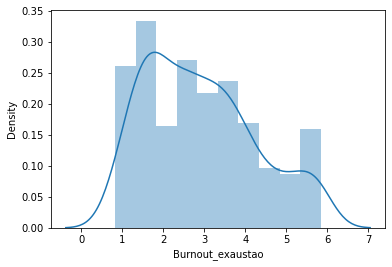

In [33]:
import seaborn as sns
sns.distplot(dados_instburn['Burnout_exaustao'].dropna())

In [17]:
dados_masculinos = dados.query("sexo == 'Masculino'")
dados_femininos = dados.query("sexo == 'Feminino'")
print ("Masculino")
print (dados_masculinos.describe())
print("-------------------------------")
print("Feminino")
print (dados_femininos.describe())

Masculino
            idade  anoFormacao      funcao  metodologia  Gerenciamento_Stress  \
count  343.000000   343.000000  343.000000   343.000000            341.000000   
mean    29.577259  1992.405248    1.338192     0.434402              5.694037   
std      6.301328   216.793099    1.233985     0.635854              0.901651   
min     18.000000     0.000000    0.000000     0.000000              2.666667   
25%     25.000000  2014.000000    1.000000     0.000000              5.000000   
50%     28.000000  2017.000000    1.000000     0.000000              6.000000   
75%     33.000000  2019.000000    1.000000     1.000000              6.333333   
max     56.000000  2024.000000    5.000000     2.000000              7.000000   

       Resolucao_Problemas  Gerenciamento_Emergencia  Aprendizado  \
count           343.000000                343.000000   342.000000   
mean              5.604956                  5.523810     5.812865   
std               0.933610                  1.001623 

In [18]:
dados_agil = dados.query("metodologia == 0")
dados_hibrida = dados.query("metodologia == 1")

Mulheres 69
Homens 343

H0 = samples are equal.
Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

In [19]:
dados_masculinos.dropna(axis=0, inplace=True)
dados_femininos.dropna(axis=0, inplace=True)

c:\Users\danilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Para  instabilidade_equipe os valores foram:
Valor de rho 9839.5
Valor de pvalue 0.056430114387872515
Grupos iguais falha em rejeitar a hipotese nula
-----------------
Para  instabilidade_tarefa os valores foram:
Valor de rho 9663.0
Valor de pvalue 0.035275198978439413
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  instabilidade_tecnica os valores foram:
Valor de rho 9332.0
Valor de pvalue 0.013080522236017689
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Burnout_cinismo os valores foram:
Valor de rho 9771.5
Valor de pvalue 0.046088524839827616
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Burnout_exaustao os valores foram:
Valor de rho 9918.5
Valor de pvalue 0.06925728148208182
Grupos iguais falha em rejeitar a hipotese nula
-----------------
Para  Burnout_eficacia os valores foram:
Valor de rho 13365.0
Valor de pvalue 0.03751290883071828
Grupos diferentes, rejeitando hipotese nula
-----------------
count    339.000000
m

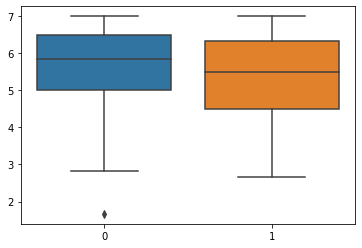

In [20]:
def verificacao_diferenca (string,dados1,dados2):
    rho, pvalue = mannwhitneyu(dados1,dados2)
    print ('Para ', string, 'os valores foram:')
    print ("Valor de rho", rho)
    print ("Valor de pvalue", pvalue)
    if pvalue>0.05:
        print('Grupos iguais falha em rejeitar a hipotese nula')
    else:
        print('Grupos diferentes, rejeitando hipotese nula')
    print('-----------------')
    #sns.boxplot(data = [dados1.dropna(),dados2.dropna()])
    #sns


#verificacao_diferenca('satisfacao',dados_masculinos.satisfacao,dados_femininos.satisfacao)
verificacao_diferenca('instabilidade_equipe',dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe)
verificacao_diferenca('instabilidade_tarefa', dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa)
verificacao_diferenca('instabilidade_tecnica', dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica)
#verificacao_diferenca('Gerenciamento_Stress', dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress)
#verificacao_diferenca('Resolucao_Problemas', dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas)
#verificacao_diferenca('Gerenciamento_Emergencia', dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia)
#verificacao_diferenca('Aprendizado', dados_masculinos.Aprendizado ,dados_femininos.Aprendizado)
#verificacao_diferenca('Interpersoal', dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
verificacao_diferenca('Burnout_cinismo', dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo)
verificacao_diferenca('Burnout_exaustao', dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao)
verificacao_diferenca('Burnout_eficacia', dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia)
#plt.boxplot([dados_masculinos.instabilidade_equipe.dropna(),dados_femininos.instabilidade_equipe.dropna()])
#plt

sns.boxplot(data= [dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia])
print(dados_masculinos.Burnout_eficacia.describe())
print(dados_femininos.Burnout_eficacia.describe())

count    339.000000
mean       5.638151
std        1.248605
min        1.333333
25%        5.000000
50%        6.000000
75%        6.666667
max        7.000000
Name: satisfacao, dtype: float64
count    68.000000
mean      5.142157
std       1.416927
min       1.000000
25%       4.000000
50%       5.333333
75%       6.333333
max       7.000000
Name: satisfacao, dtype: float64


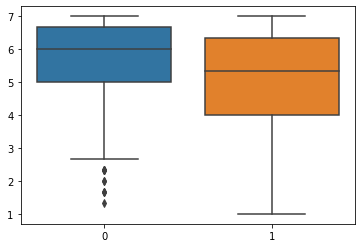

In [21]:
sns.boxplot(data= [dados_masculinos.satisfacao ,dados_femininos.satisfacao])
print(dados_masculinos.satisfacao.describe())
print(dados_femininos.satisfacao.describe())

In [22]:
verificacao_diferenca('instabilidade_equipe',dados_agil.instabilidade_equipe,dados_hibrida.instabilidade_equipe)
verificacao_diferenca('instabilidade_tarefa', dados_agil.instabilidade_tarefa ,dados_hibrida.instabilidade_tarefa)
verificacao_diferenca('instabilidade_tecnica', dados_agil.instabilidade_tecnica ,dados_hibrida.instabilidade_tecnica)
verificacao_diferenca('Burnout_cinismo', dados_agil.Burnout_cinismo ,dados_hibrida.Burnout_cinismo)
verificacao_diferenca('Burnout_exaustao', dados_agil.Burnout_exaustao ,dados_hibrida.Burnout_exaustao)
verificacao_diferenca('Burnout_eficacia', dados_agil.Burnout_eficacia ,dados_hibrida.Burnout_eficacia)


Para  instabilidade_equipe os valores foram:
Valor de rho 12474.0
Valor de pvalue 0.006075971826304375
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  instabilidade_tarefa os valores foram:
Valor de rho 13457.5
Valor de pvalue 0.08223498811539616
Grupos iguais falha em rejeitar a hipotese nula
-----------------
Para  instabilidade_tecnica os valores foram:
Valor de rho 11228.5
Valor de pvalue 5.9569114230520854e-05
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Burnout_cinismo os valores foram:
Valor de rho 12865.0
Valor de pvalue 0.018467350487504454
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Burnout_exaustao os valores foram:
Valor de rho 13684.0
Valor de pvalue 0.1317782961786827
Grupos iguais falha em rejeitar a hipotese nula
-----------------
Para  Burnout_eficacia os valores foram:
Valor de rho 16335.0
Valor de pvalue 0.23130541296148066
Grupos iguais falha em rejeitar a hipotese nula
-----------------


<AxesSubplot:>

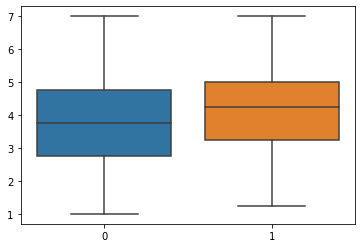

In [23]:
sns.boxplot(data= [dados_agil.instabilidade_equipe,dados_hibrida.instabilidade_equipe])

<AxesSubplot:>

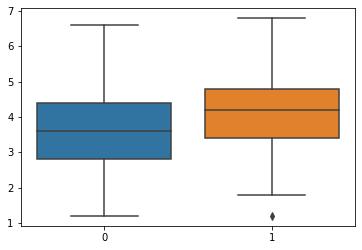

In [24]:
sns.boxplot(data= [dados_agil.instabilidade_tecnica ,dados_hibrida.instabilidade_tecnica])

<AxesSubplot:>

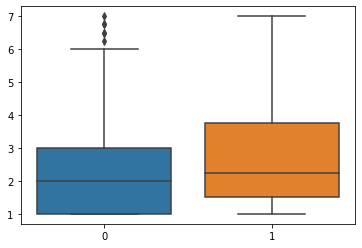

In [25]:
sns.boxplot(data= [dados_agil.Burnout_cinismo ,dados_hibrida.Burnout_cinismo])

count    339.000000
mean       5.605457
std        0.930129
min        1.750000
25%        5.000000
50%        5.750000
75%        6.250000
max        7.000000
Name: Resolucao_Problemas, dtype: float64
count    68.000000
mean      5.169118
std       0.934857
min       3.000000
25%       4.500000
50%       5.250000
75%       6.000000
max       7.000000
Name: Resolucao_Problemas, dtype: float64
2.94862179117672e-09
0.1045469343662262
0.0004674679205937175


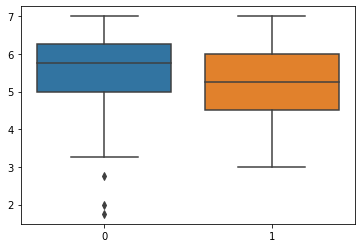

In [26]:
dados.idade.describe()
sns.boxplot(data= [dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas])
print(dados_masculinos.Resolucao_Problemas.describe())
print(dados_femininos.Resolucao_Problemas.describe())
rho, p = shapiro(dados_masculinos.Resolucao_Problemas)

print (p)
rho, p = shapiro(dados_femininos.Resolucao_Problemas)
print (p)

rho, p = ttest_ind(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas)
print (p)



count    339.000000
mean       6.216077
std        0.670842
min        3.750000
25%        5.750000
50%        6.250000
75%        6.750000
max        7.000000
Name: Interpersoal, dtype: float64
count    68.000000
mean      6.044118
std       0.789319
min       4.000000
25%       5.500000
50%       6.250000
75%       6.750000
max       7.000000
Name: Interpersoal, dtype: float64


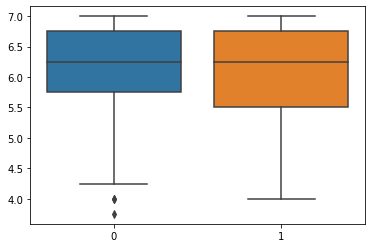

In [27]:
sns.boxplot(data= [dados_masculinos.Interpersoal ,dados_femininos.Interpersoal])
print(dados_masculinos.Interpersoal.describe())
print(dados_femininos.Interpersoal.describe())

In [28]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/danilo/Documentos/GitHub/zup-pesquisa-dados/danilo/zupedu/zupstatistic')
from zupstatistic import zupstats

teste = zupstats.bootstrap(dados_masculinos.Resolucao_Problemas)


z = plt.hist(teste)
z


ModuleNotFoundError: No module named 'zupstatistic'

(array([ 2.,  4.,  6.,  9.,  4., 15., 13.,  9.,  8.,  2.]),
 array([12. , 13.6, 15.2, 16.8, 18.4, 20. , 21.6, 23.2, 24.8, 26.4, 28. ]),
 <BarContainer object of 10 artists>)

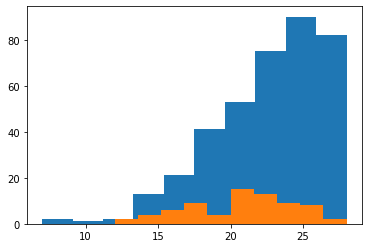

In [ ]:
x = plt.hist(dados_masculinos.Resolucao_Problemas)
x
plt.hist(dados_femininos.Resolucao_Problemas)

ValueError: cannot convert float NaN to integer

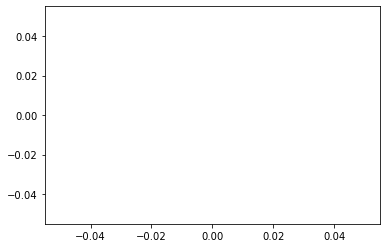

In [ ]:
sns.distplot(dados_masculinos.satisfacao)

/documents/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfacao', ylabel='Density'>

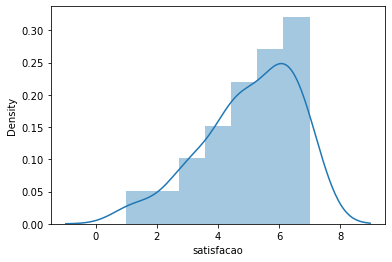

In [ ]:
sns.distplot(dados_femininos.satisfacao)

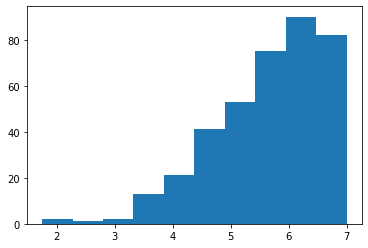

In [ ]:
x = plt.hist(dados_masculinos.Resolucao_Problemas)

In [ ]:
import numpy as np

teste = np.random.choice(dados_masculinos.Resolucao_Problemas, size=100)

x = plt.hist(teste)

In [ ]:
import pingouin as pg
pg.compute_effsize(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas, eftype='CLES', paired= False)

print('Resolução de problemas: ')
print(pg.mwu(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas))
print('Satisfação: ')
print(pg.mwu(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas))

Resolução de problemas: 
       U-val alternative     p-val       RBC      CLES
MWU  17418.0   two-sided  0.000223 -0.273246  0.636623
Satisfação: 
       U-val alternative     p-val       RBC      CLES
MWU  17418.0   two-sided  0.000223 -0.273246  0.636623


In [ ]:
import sys
sys.path.append('/home/danilo/Documentos/GitHub/zup-pesquisa-dados/danilo')
import ZupEduStats.zupedustats as zup
zup.verifica_df_dependente(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas)


Teste na primeira váriavel:
Distribuição não normal 3.6868513797472247e-10
Teste na segunda váriavel:
Distribuição normal 0.11451186239719391
Aplicando Mannwthiteyu...
9942.0
0.00011155819820588666
Os grupos são diferentes


In [ ]:
pip install pingouin --user

Processing c:\users\danilo.ribeiro\appdata\local\pip\cache\wheels\ec\70\de\1e3c7a601836488b2cf43111bbf06c569e2a0b8d01b7d727a1\pingouin-0.4.0-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached xarray-0.19.0-py3-none-any.whl (827 kB)
Processing c:\users\danilo.ribeiro\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a\littleutils-0.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pingouin as pg

pg.mwu(dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
print (pg.mwu( dados_masculinos.satisfacao,dados_femininos.satisfacao))
print ('instabilidade_equipe ') 
print (pg.mwu( dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe))
print ('instabilidade_tarefa') 
print (pg.mwu( dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa))
print ('instabilidade_tecnica')
print (pg.mwu( dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica))
print ('Gerenciamento_Stress')
print (pg.mwu( dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress))
print ('Resolucao_Problemas')
print (pg.mwu(  dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas))
print ('Gerenciamento_Emergencia')
print (pg.mwu( dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia))
print ('Aprendizado') 
print (pg.mwu( dados_masculinos.Aprendizado ,dados_femininos.Aprendizado))
print ('Interpersoal') 
print (pg.mwu( dados_masculinos.Interpersoal ,dados_femininos.Interpersoal))
print ('Burnout_cinismo') 
print (pg.mwu( dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo))
print ('Burnout_exaustao') 
print (pg.mwu( dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao))
print ('Burnout_eficacia') 
print (pg.mwu( dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia))



       U-val alternative     p-val       RBC      CLES
MWU  13287.5   two-sided  0.115266 -0.119607  0.559804
instabilidade_equipe 
       U-val alternative     p-val       RBC      CLES
MWU  10453.5   two-sided  0.053754  0.146479  0.426761
instabilidade_tarefa
       U-val alternative     p-val       RBC      CLES
MWU  10075.5   two-sided  0.021344  0.175018  0.412491
instabilidade_tecnica
      U-val alternative     p-val       RBC      CLES
MWU  9463.0   two-sided  0.002752  0.227353  0.386324
Gerenciamento_Stress
       U-val alternative     p-val       RBC      CLES
MWU  15486.5   two-sided  0.073707 -0.132054  0.566027
Resolucao_Problemas
       U-val alternative     p-val       RBC      CLES
MWU  17418.0   two-sided  0.000223 -0.273246  0.636623
Gerenciamento_Emergencia
       U-val alternative     p-val      RBC     CLES
MWU  14862.5   two-sided  0.242317 -0.08644  0.54322
Aprendizado
       U-val alternative     p-val       RBC      CLES
MWU  14602.5   two-sided  0.342337 -0.

In [ ]:
import pingouin as pg

pg.mwu(dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
print (pg.mwu( dados_masculinos.satisfacao,dados_femininos.satisfacao))
print ('instabilidade_equipe ') 
print (pg.mwu( dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe))
print ('instabilidade_tarefa') 
print (pg.mwu( dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa))
print ('instabilidade_tecnica')
print (pg.mwu( dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica))
print ('Gerenciamento_Stress')
print (pg.mwu( dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress))
print ('Resolucao_Problemas')
print (pg.mwu(  dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas))
print ('Gerenciamento_Emergencia')
print (pg.mwu( dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia))
print ('Aprendizado') 
print (pg.mwu( dados_masculinos.Aprendizado ,dados_femininos.Aprendizado))
print ('Interpersoal') 
print (pg.mwu( dados_masculinos.Interpersoal ,dados_femininos.Interpersoal))
print ('Burnout_cinismo') 
print (pg.mwu( dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo))
print ('Burnout_exaustao') 
print (pg.mwu( dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao))
print ('Burnout_eficacia') 
print (pg.mwu( dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia))



       U-val alternative     p-val       RBC      CLES
MWU  13287.5   two-sided  0.115266 -0.119607  0.559804
instabilidade_equipe 
       U-val alternative     p-val       RBC      CLES
MWU  10453.5   two-sided  0.053754  0.146479  0.426761
instabilidade_tarefa
       U-val alternative     p-val       RBC      CLES
MWU  10075.5   two-sided  0.021344  0.175018  0.412491
instabilidade_tecnica
      U-val alternative     p-val       RBC      CLES
MWU  9463.0   two-sided  0.002752  0.227353  0.386324
Gerenciamento_Stress
       U-val alternative     p-val       RBC      CLES
MWU  15486.5   two-sided  0.073707 -0.132054  0.566027
Resolucao_Problemas
       U-val alternative     p-val       RBC      CLES
MWU  17418.0   two-sided  0.000223 -0.273246  0.636623
Gerenciamento_Emergencia
       U-val alternative     p-val      RBC     CLES
MWU  14862.5   two-sided  0.242317 -0.08644  0.54322
Aprendizado
       U-val alternative     p-val       RBC      CLES
MWU  14602.5   two-sided  0.342337 -0.

In [ ]:
dados_femininos.satisfacao

0     21.0
1     19.0
2     13.0
3     21.0
4     20.0
      ... 
67    13.0
68     NaN
69    16.0
70    21.0
71    19.0
Name: satisfacao, Length: 72, dtype: float64

(array([ 3.,  0.,  3.,  6.,  3.,  6., 13.,  7., 17., 11.]),
 array([ 3. ,  4.8,  6.6,  8.4, 10.2, 12. , 13.8, 15.6, 17.4, 19.2, 21. ]),
 <BarContainer object of 10 artists>)

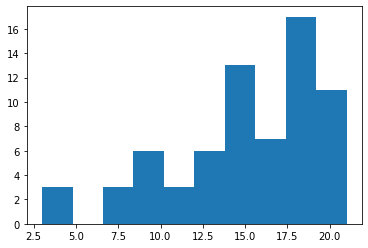

In [ ]:
plt.hist(dados_femininos.satisfacao)

In [ ]:
teste = dados_femininos.satisfacao.dropna()

type(teste)
teste

0     21.0
1     19.0
2     13.0
3     21.0
4     20.0
      ... 
66    18.0
67    13.0
69    16.0
70    21.0
71    19.0
Name: satisfacao, Length: 69, dtype: float64

In [ ]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.satisfacao.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

In [ ]:
sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.satisfacao.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

(array([  5.,  24.,  70., 108., 193., 226., 191., 120.,  50.,  13.]),
 array([4.91333333, 4.997     , 5.08066667, 5.16433333, 5.248     ,
        5.33166667, 5.41533333, 5.499     , 5.58266667, 5.66633333,
        5.75      ]),
 <BarContainer object of 10 artists>)

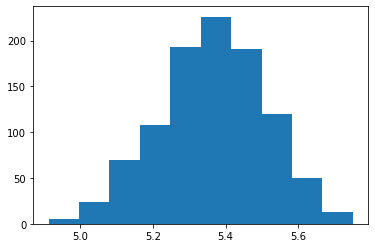

In [ ]:
plt.hist(sample_mean_m)

In [ ]:
import pingouin as pg
#pg.mwu(sample_mean_m,sample_mean_f)
pg.ttest(sample_mean_m,sample_mean_f)

/documents/lib/python3.9/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,48.115846,1998,two-sided,0.0,"[0.31, 0.34]",2.151806,inf,1.0


(array([  4.,  17.,  59., 135., 237., 242., 194.,  85.,  19.,   8.]),
 array([4.51333333, 4.61566667, 4.718     , 4.82033333, 4.92266667,
        5.025     , 5.12733333, 5.22966667, 5.332     , 5.43433333,
        5.53666667]),
 <BarContainer object of 10 artists>)

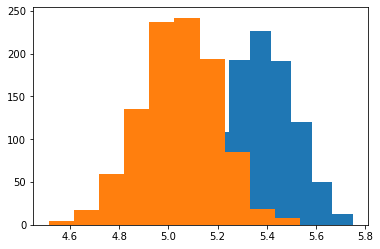

In [ ]:
plt.hist(sample_mean_m)
plt.hist(sample_mean_f)

In [ ]:

from bootstrap import Bootstrap


teste = Bootstrap()
teste.soma()


3

                T   dof alternative  p-val         CI95%   cohen-d BF10  power
T-test  57.113155  1998   two-sided    0.0  [0.17, 0.18]  2.554178  inf    1.0


/documents/lib/python3.9/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([  5.,  24.,  67., 136., 207., 265., 190.,  87.,  16.,   3.]),
 array([5.74305556, 5.80208333, 5.86111111, 5.92013889, 5.97916667,
        6.03819444, 6.09722222, 6.15625   , 6.21527778, 6.27430556,
        6.33333333]),
 <BarContainer object of 10 artists>)

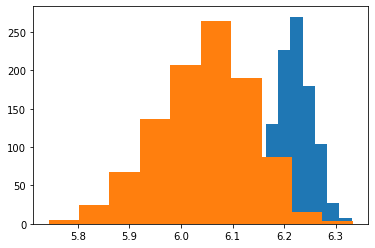

In [ ]:


interpessoalMasculinoBS =  teste.doBoot(dados_masculinos.Interpersoal, len(dados_masculinos.Interpersoal))

interpessoalFemininoBS = teste.doBoot(dados_femininos.Interpersoal, len(dados_femininos.Interpersoal))

print(pg.ttest(interpessoalMasculinoBS,interpessoalFemininoBS))



plt.hist(interpessoalMasculinoBS)
plt.hist(interpessoalFemininoBS)





<AxesSubplot:>

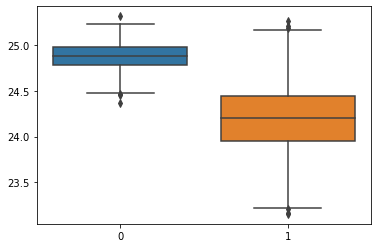

In [ ]:
sns.boxplot(data= [interpessoalMasculinoBS ,interpessoalFemininoBS])

                T   dof alternative          p-val         CI95%   cohen-d  \
T-test  44.420036  1998   two-sided  2.409357e-300  [0.13, 0.14]  1.986524   

              BF10  power  
T-test  8.415e+295    1.0  


(array([  8.,  31., 101., 147., 214., 257., 150.,  59.,  27.,   6.]),
 array([4.59722222, 4.65162037, 4.70601852, 4.76041667, 4.81481481,
        4.86921296, 4.92361111, 4.97800926, 5.03240741, 5.08680556,
        5.1412037 ]),
 <BarContainer object of 10 artists>)

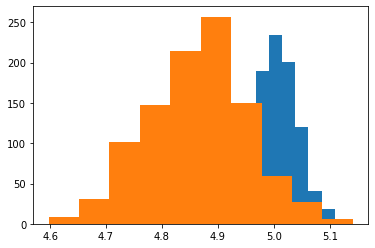

In [ ]:
MasculinoBS =  teste.doBoot(dados_masculinos.Burnout_eficacia.dropna(), len(dados_masculinos.Burnout_eficacia))

FemininoBS = teste.doBoot(dados_femininos.Burnout_eficacia.dropna(), len(dados_femininos.Burnout_eficacia))

print(pg.ttest(MasculinoBS,FemininoBS))



plt.hist(MasculinoBS)
plt.hist(FemininoBS)

<AxesSubplot:>

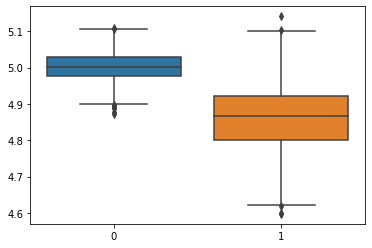

In [ ]:
sns.boxplot(data= [MasculinoBS ,FemininoBS])

                T   dof alternative  p-val         CI95%   cohen-d BF10  power
T-test  56.485804  1998   two-sided    0.0  [0.32, 0.34]  2.526122  inf    1.0


/documents/lib/python3.9/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([  4.,  17.,  59., 171., 238., 258., 149.,  78.,  20.,   6.]),
 array([2.61885965, 2.66333333, 2.70780702, 2.7522807 , 2.79675439,
        2.84122807, 2.88570175, 2.93017544, 2.97464912, 3.01912281,
        3.06359649]),
 <BarContainer object of 10 artists>)

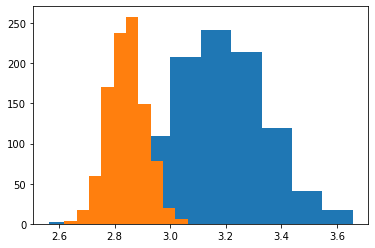

In [ ]:

FemininoBS  =  teste.doBoot(dados_masculinos.Burnout_exaustao.dropna(), len(dados_masculinos.Burnout_exaustao))
MasculinoBS = teste.doBoot(dados_femininos.Burnout_exaustao.dropna(), len(dados_femininos.Burnout_exaustao))

print(pg.ttest(MasculinoBS,FemininoBS))



plt.hist(MasculinoBS)
plt.hist(FemininoBS)

<AxesSubplot:>

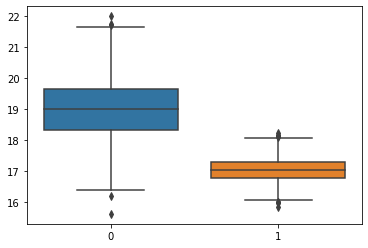

In [ ]:
sns.boxplot(data= [MasculinoBS ,FemininoBS])

In [ ]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


                T   dof alternative  p-val          CI95%   cohen-d BF10  \
T-test -52.111401  1998   two-sided    0.0  [-0.7, -0.65]  2.330493  inf   

        power  
T-test    1.0  


C:\Users\danilo.ribeiro\AppData\Roaming\Python\Python38\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([  4.,  23.,  67., 155., 266., 272., 155.,  48.,   9.,   1.]),
 array([23.92 , 24.116, 24.312, 24.508, 24.704, 24.9  , 25.096, 25.292,
        25.488, 25.684, 25.88 ]),
 <BarContainer object of 10 artists>)

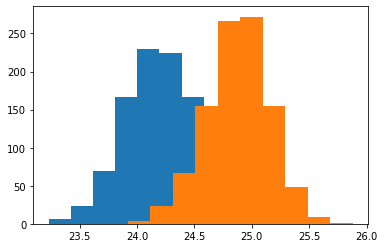

In [ ]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.Interpersoal.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.Interpersoal.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

print(pg.ttest(sample_mean_m,sample_mean_f))

plt.hist(sample_mean_m)
plt.hist(sample_mean_f)


               T   dof alternative          p-val          CI95%   cohen-d  \
T-test -23.54105  1998   two-sided  2.359177e-108  [-0.4, -0.34]  1.052788   

             BF10  power  
T-test  2.88e+104    1.0  


(array([  2.,  12.,  36., 121., 235., 254., 220.,  85.,  31.,   4.]),
 array([21.89 , 22.146, 22.402, 22.658, 22.914, 23.17 , 23.426, 23.682,
        23.938, 24.194, 24.45 ]),
 <BarContainer object of 10 artists>)

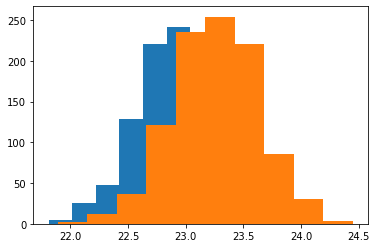

In [ ]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.Aprendizado.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.Aprendizado.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

print(pg.ttest(sample_mean_m,sample_mean_f))

plt.hist(sample_mean_m)
plt.hist(sample_mean_f)
